In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Архитектура VGG

**VGG - нейронная сеть для выделения признаков изображения.** Это глубокая нейронная сеть, количество слове варьируется от выбранной архитектуры ниже.

На вход первого сверточного слоя **подается RGB изображение 224x224**. Далее изображения проходят через стек сверточных слоев, в которых используются **фильтры с очень маленьким рецептивным полем размера 3х3** (который является наименьшим размером для получения представления о том,где находится право/лево, верх/низ, центр).

Все скрытые слои снабжены ReLU.

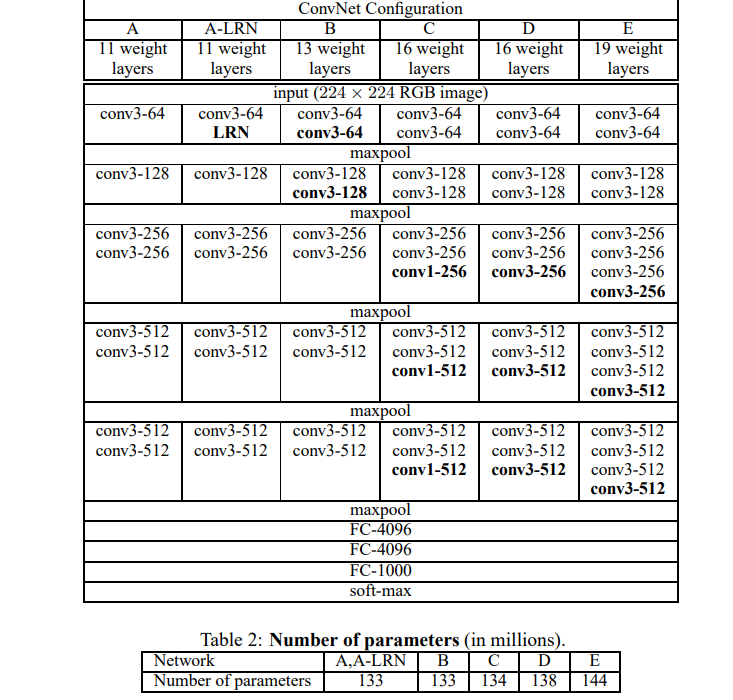

# Реализация VGG16

Реализуем архитектуру VGG16 (16 слоев).

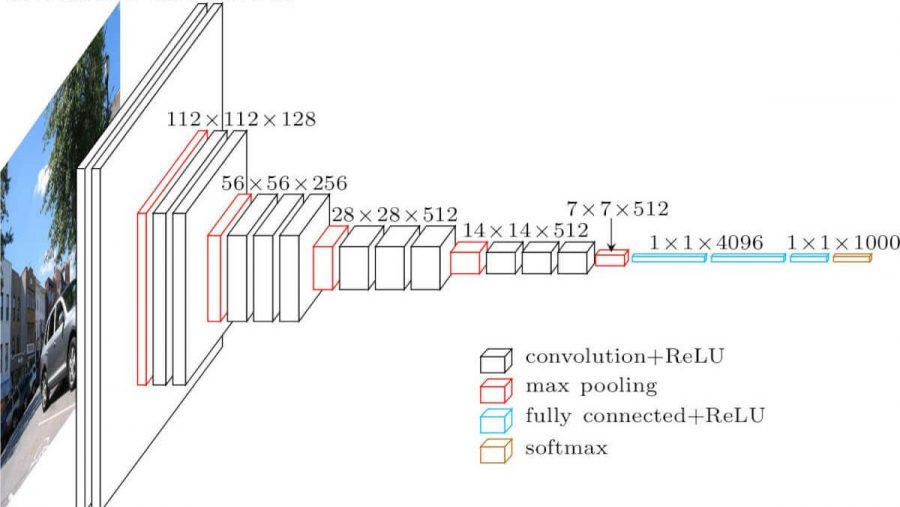

**Ее особенности:**
1. На вход подается RGB-изображение 224x224
2. После каждого слоя применяется функция активации ReLU
3. Применяется свертка 3х3 , повышая количество каналов 
4. При переходе используется maxpooling уменьшая размер изображения
5. В конце сети используем Flatten
6. Далее несколько полносвязных слоев
7. В конце применяем SoftMax


**Унаследуемся от класса nn.Module()**

In [4]:
class VGG16(nn.Module):
    
    def __init__(self, out_nc):
        super().__init__()
        
        self.act = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2))
        
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64,
                                kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64,
                                kernel_size=3, padding=1)
        
        
        
        
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128,
                                kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128,
                                kernel_size=3, padding=1)
        
        
        
        
        
        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256,
                                kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256,
                                kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256,
                                kernel_size=3, padding=1)
        
        
        
        
        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512,
                                kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512,
                                kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512,
                                kernel_size=3, padding=1)
        
        
        
        
        
        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512,
                                kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512,
                                kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512,
                                kernel_size=3, padding=1)
        
        
        
        
        self.flat = nn.Flatten()
        
        self.fc1 = nn.Linear(7*7*512, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, out_nc)
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        
        out = self.conv1_1(x)
        out = self.act(out)
        out = self.conv1_2(out)
        out = self.act(out)
        
        
        out = self.maxpool(out)
        out = self.conv2_1(out)
        out = self.act(out)
        out = self.conv2_2(out)
        out = self.act(out)
        
        
        out = self.maxpool(out)
        out = self.conv3_1(out)
        out = self.act(out)
        out = self.conv3_2(out)
        out = self.act(out)
        out = self.conv3_3(out)
        out = self.act(out)
        
        
        
        out = self.maxpool(out)
        out = self.conv4_1(out)
        out = self.act(out)
        out = self.conv4_2(out)
        out = self.act(out)
        out = self.conv4_3(out)
        out = self.act(out)
        
        
        
        out = self.maxpool(out)
        out = self.conv5_1(out)
        out = self.act(out)
        out = self.conv5_2(out)
        out = self.act(out)
        out = self.conv5_3(out)
        out = self.act(out)
        
        
        
        out = self.maxpool(out)
        out = self.flat(out)
        out = self.fc1(out)
        out = self.act(out)
        out = self.fc2(out)
        out = self.act(out)
        out = self.fc3(out)
        
        return out

**Отмечу, что слой Flatten преобразует**
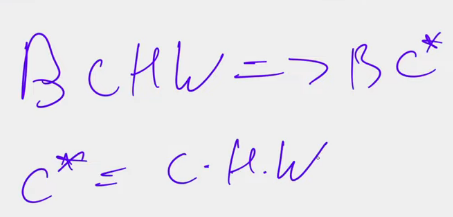

# Вывод

Таким образом, в данной работе была реализована архитектура VGG16 и рассмотрены ее особенности. Стоит отметить, что сеть VGG очень тяжелая и занимает много вычислительнх ресурсов.